# CREDIT CARD FRAUD DETECTION
# Jacopo Passaro
### IT Coding Project for Module II trial

### According to Cornell University definition, Credit card fraud is a form of identity theft that involves an unauthorized taking of another's credit card information for the purpose of charging purchases to the account or removing funds from it.


###By considering a DATA DRIVEN DETECTION SYSTEM, a credit card fraud detection can be defined as an IMBALANCED CLASSIFICATION PROBLEM for Machine Learning Techniques

### Some stats about
- One American over ten has been a victim of credit card fraud (median amount of $399), according to the Statistic Brain Research Institute (2018)
- The total level of card fraud losses amounted to €1.8 billion in 2018 in the Single European Payment Area (SEPA) (ECB REPORT 2018)

## Main Challenges for this task:
- Class imbalance
- Categorical Features
- Performance Measure
- Lack of clear publicly available datasets


The scarcity or the objective complexity to handle with credit cards public datasets made me strongly convinced to try exploring the world of synthetic datasets production.

In this case, I will assume that a local Bank Institute in Brescia wants to investigate over the payments made with its affiliated terminals during a Summer weekend (Saturday and Sunday) in order to check eventual fraudolent events.

## **********MAIN STEPS**********

1. PAYMENT CARD DATA SIMULATOR
2. FEATURE ENGINEERING
3. FRAUD DETECTION SYSTEM
4. ASSESS PERFORMANCE

# 1. CC Transactions Synthetic Dataset

In its simplest form, a payment card transaction consists of any amount paid to a merchant by a customer at a certain time.

A set of historical transaction data may be represented as:
- DATE/TIME
- CUSTOMER ID
- TERMINAL ID
- AMOUNT
- FRAUD BINARY CLASS

## Generation process
1. Customer profiles generation
2. Terminals generation
3. Associate Customers to Terminals
4. Generate Transactions
5. Generate Fraud scenarios for binary classification

In [1]:
import random as rn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# 1.1 Customer Generation
# First a function to generate costumers data randomly

def create_customer_table(num_customers, ran_state = 0):

  # Setting a seed for helping reproducibility in results
  np.random.seed(ran_state)
  customer_props = []

  for id_customer in range(num_customers):

    # Customer transactions habits
    # Assuming values coming from uniform distribution to reflect equally likely events
    mean_amount = np.random.uniform(10,500)
    std_amount = mean_amount/2

    # Payments per day hypothesis
    # Same idea for average number of payments for each customer
    # For simplicity I will assume a maximum of 25 payments on average
    pay_per_day = np.random.uniform(0,25)


    customer_props.append([id_customer, mean_amount, std_amount, pay_per_day])

  # Create a data frame containing all created information
  customer_table = pd.DataFrame(customer_props, columns = ['CUSTOM_ID',
                                                           'MEAN_EXP',
                                                           'STD_EXP',
                                                           'PAYSxDAY'])

  return customer_table

In [8]:
custom_table = create_customer_table(1000,1)
custom_table

,CUSTOM_ID,MEAN_EXP,STD_EXP,PAYSxDAY
0,0,214.340782,107.170391,18.008112
1,1,10.056044,5.028022,7.558314
2,2,81.910387,40.955193,2.308465
3,3,101.267504,50.633752,8.639018
4,4,204.416062,102.208031,13.470418
...,...,...,...,...
995,995,433.430606,216.715303,11.197473
996,996,285.275268,142.637634,18.417774
997,997,400.279545,200.139772,11.187703
998,998,100.222503,50.111251,20.718321


In [4]:
# 1.2 Terminals Generation

def create_terminal_table(n_terminals, ran_state = 0):

  np.random.seed(ran_state)

  # Define a long string from which select random elements to simulate an alfanumeric series for each terminal
  terminals = []
  numslets = 'kwbdvbLWKDB82751HV356BDFASW8778678HJV3523MNVVV876834K5B3B3KGFSKVSV7D890GJ9H9GF29376SFV6AS98F6G0A2JH45òKHS98DV7S98DDS87D874LN4N5NM5N'

  for id_terminal in range(n_terminals):
    series = ''.join([numslets[np.random.randint(len(numslets))] for _ in range(6)])
    terminals.append([id_terminal, series])

  terminal_table = pd.DataFrame(terminals, columns = ['ID_TERMINAL', 'SERIES'])

  return terminal_table




In [9]:
# Assume that our local bank in Brescia has a number of affiliated terminal between 500 and 1000
terminal_table = create_terminal_table(rn.randint(500,1000),2)
terminal_table

,ID_TERMINAL,SERIES
0,0,1JDV9S
1,1,WA97V6
2,2,483KvD
3,3,4H58K4
4,4,D9S8A4
...,...,...
636,636,DD69V5
637,637,F5857N
638,638,D2Wò4S
639,639,533Bò6


In [10]:
# 1.3 Associate Randomly Customers to Terminals

def get_used_terminals(custom_table, terminal_table):

  terminal_list = terminal_table['ID_TERMINAL'].tolist()


  used_terminals = []

  for costumer in custom_table['CUSTOM_ID'].tolist():

     n = rn.randint(1,25)

     # A random sample of terminals assigned to each customer as simulated used terminals for payments
     used_terminal = rn.sample(terminal_list, n)
     used_terminals.append(used_terminal)

  custom_table['USED_TERMS'] = used_terminals

  return custom_table



In [11]:
get_used_terminals(custom_table, terminal_table)

,CUSTOM_ID,MEAN_EXP,STD_EXP,PAYSxDAY,USED_TERMS
0,0,214.340782,107.170391,18.008112,"[525, 363, 90, 138, 443, 227, 137, 79, 298, 22..."
1,1,10.056044,5.028022,7.558314,"[312, 606, 135, 530, 353, 67, 573, 375, 513, 2..."
2,2,81.910387,40.955193,2.308465,"[215, 624, 588, 28, 148, 172, 165, 260, 469, 1..."
3,3,101.267504,50.633752,8.639018,"[267, 87, 617, 514, 500, 37, 197, 604, 498, 34..."
4,4,204.416062,102.208031,13.470418,"[534, 122, 292, 264, 453, 417, 95, 187, 111, 2..."
...,...,...,...,...,...
995,995,433.430606,216.715303,11.197473,"[454, 403, 114, 298, 552, 613, 491, 379, 337, ..."
996,996,285.275268,142.637634,18.417774,"[338, 602, 493, 307, 410, 448, 122, 509, 5, 56..."
997,997,400.279545,200.139772,11.187703,"[320, 183, 620, 224, 495, 630, 533, 535]"
998,998,100.222503,50.111251,20.718321,"[25, 103, 518, 423]"


In [12]:
# 1.4 Create table of transactions

def generate_transactions(custom_table, start_date = '2023-07-29' , days = 2 ):

  # Initialize a List for all future transactions
  trxs = []

  # Considering transactions for each input days
  for day in range(days):



     # We are going to considering different transactions for each customer from customer table
     for id in custom_table['CUSTOM_ID']:

      # Number of transactions: random sample of data from a Poisson distribution using
      # values from PAYSxDAY as input parameter
      num_trx = np.random.poisson(custom_table.PAYSxDAY)

      # Pick up one value from num_trx array: it corresponds to the number of transactions
      # to generate
      trx = rn.choice(num_trx)

      # Number of transactions extracted must be greater than zero
      if trx > 0:

        for i in range(trx):

          # Select a terminal from used terminal list of each customer
          list_terminal = custom_table.iloc[id, 4]
          used_terminal = rn.choice(list_terminal)

          # Time of transaction: simulating the fact that
          # most transactions occur during the day by using a normal distribution with mean half of a day
          # and variance correspondent to a quarter of a day
          time_trx = int(np.random.normal(86400/2, 21600))

          # Some TRX may be out of range of a day time (trx > 86400)
          # So the "if condition" will guarantee that only acceptable times will be kept
          if time_trx < 86400 and time_trx > 0:

            # Amount of transactions : referring to mean of expenditure and standard
            # deviation, any amount could follow a normal distribution
            amount_distrib = np.random.normal(custom_table.MEAN_EXP, custom_table.STD_EXP).round(2)

            # Assign amount to transaction
            amount = rn.choice(amount_distrib)

            # Amount must be greater than zero
            if amount > 0:

              # Append information to transactions table
              # A little trick about time_trx attribute will allow us to change date into dataset according to days
                trxs.append([time_trx+day*86400, day, id, used_terminal, amount])



  # Finally getting the data frame of transactions
  # For a realistic information, Time_Seconds is converted into date format
  transactions_df = pd.DataFrame(trxs, columns = ['Time_Seconds','Day', 'CUSTOM_ID', 'TERMINAL', 'AMOUNT'])
  transactions_df['DATETIME'] = pd.to_datetime(transactions_df["Time_Seconds"], unit='s', origin=start_date)


  trans_id = []
  for trx in range(0, len(transactions_df)):
    trans_id.append(trx)

  # Finally creating an ID also for transactions
  transactions_df['TRX_ID'] = trans_id

  return transactions_df

In [14]:
TRANS_TABLE = generate_transactions(custom_table, start_date = '2023-07-29' , days = 2 )
TRANS_TABLE
# So we have got a pretty realistic and acceptable dataset of transactions with more than 20k rows and 7 attributes.
# Obviously it is possibile to increment or decrement the size of the table according to preferences

,Time_Seconds,Day,CUSTOM_ID,TERMINAL,AMOUNT,DATETIME,TRX_ID
0,18270,0,0,611,419.93,2023-07-29 05:04:30,0
1,73806,0,0,37,49.75,2023-07-29 20:30:06,1
2,44060,0,0,137,14.28,2023-07-29 12:14:20,2
3,76886,0,0,443,569.05,2023-07-29 21:21:26,3
4,44138,0,0,298,297.59,2023-07-29 12:15:38,4
...,...,...,...,...,...,...,...
24642,131668,1,999,312,26.53,2023-07-30 12:34:28,24642
24643,164169,1,999,354,37.72,2023-07-30 21:36:09,24643
24644,152837,1,999,434,478.96,2023-07-30 18:27:17,24644
24645,141985,1,999,87,18.01,2023-07-30 15:26:25,24645


It is possible to quicly check some amount values for dirrentent costumers just to detect the vicinity respect to previous mean_exp and std_exp

In [15]:
TRANS_TABLE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24647 entries, 0 to 24646
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Time_Seconds  24647 non-null  int64         
 1   Day           24647 non-null  int64         
 2   CUSTOM_ID     24647 non-null  int64         
 3   TERMINAL      24647 non-null  int64         
 4   AMOUNT        24647 non-null  float64       
 5   DATETIME      24647 non-null  datetime64[ns]
 6   TRX_ID        24647 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 1.3 MB


And then a simple statistical description of all variables just to take a look to different means and scales

In [16]:
TRANS_TABLE.describe()

,Time_Seconds,Day,CUSTOM_ID,TERMINAL,AMOUNT,TRX_ID
count,24647.000000,24647.00000,24647.000000,24647.000000,24647.000000,24647.000000
mean,85816.887938,0.49365,502.172638,317.289731,263.202022,12323.000000
std,47119.841839,0.49997,284.010399,184.262767,201.753492,7115.120378
min,8.000000,0.00000,0.000000,0.000000,0.010000,0.000000
25%,42969.500000,0.00000,260.000000,159.000000,100.480000,6161.500000
50%,82851.000000,0.00000,508.000000,316.000000,219.990000,12323.000000
75%,129087.000000,1.00000,742.000000,475.000000,384.305000,18484.500000
max,172791.000000,1.00000,999.000000,640.000000,1353.310000,24646.000000


array([[<Axes: title={'center': 'Time_Seconds'}>,
        <Axes: title={'center': 'AMOUNT'}>]], dtype=object)

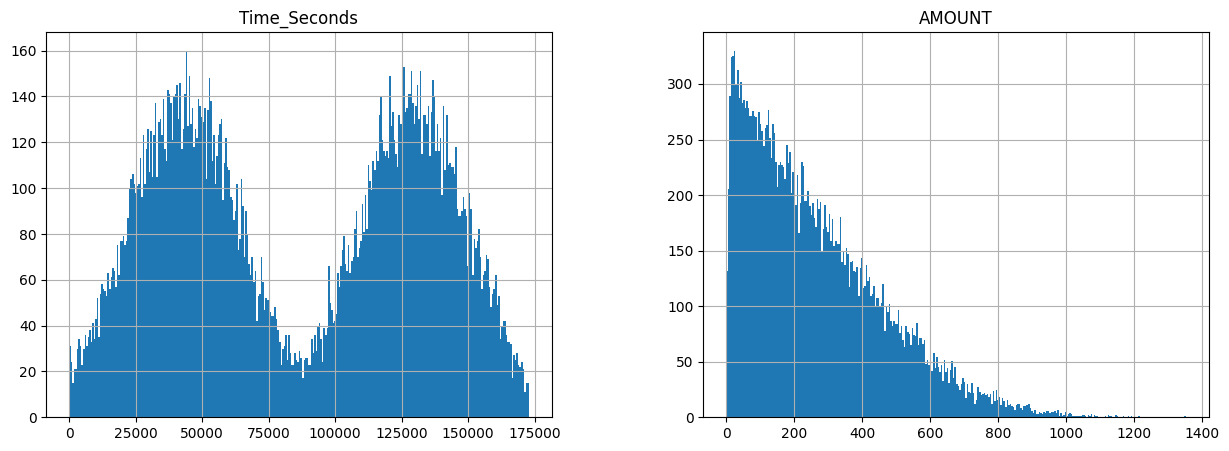

In [17]:
# Plots of Time and Amount Distributions
time_amount = TRANS_TABLE.loc[:, ['Time_Seconds','AMOUNT']]
time_amount.hist(bins = 300, figsize = (15,5), layout = (1,2))

sns.histplot(TRANS_TABLE['AMOUNT'], kde=True)

According to initial hypothesis, the shapes of these distribution reflect that the majority of transactions occur during daytime and have lower values respect to big expenses that are less frequent

### 1.5 Fraud Scenarios
Here I will introduce 2 realistic scenarios for fraudolent transactions
- Criminal use of terminals: within 2 days of dataset, a list of 2 terminals is selected as fraudolent in every transactions

- Some robbed credit cards: a list of 3 random costumers perform fraudolent transactions

There is obviously an infinite potential for creating and adding other scenarios, but do not exceed just for keeping an imbalanced condition of events

In [18]:
def input_fraud(TRANS_TABLE):

  # First introducing new column referring to fraud cases
  TRANS_TABLE['FRAUD_CLASS'] = 0

  # Fraud scenario:
  # sample of 1% of terminals from terminals_table:
  #   all transactions of correspondent terminals in TRANS_TABLE -> FRAUD == 1
  term_sample = int(len(terminal_table)*0.01)
  fraud_terms = rn.choices(terminal_table.ID_TERMINAL, k = term_sample)
  TRANS_TABLE.loc[TRANS_TABLE.TERMINAL.isin(fraud_terms), 'FRAUD_CLASS']=1

  # Second fraud scenario
  # sample of 0,8% of customers from custom_table:
  #   all transactions correspondent in TRANS_TABLE -> FRAUD == 1
  custom_sample= int(len(custom_table)*0.008)
  fraud_custom = rn.choices(custom_table.CUSTOM_ID, k = custom_sample )
  TRANS_TABLE.loc[TRANS_TABLE.CUSTOM_ID.isin(fraud_custom), 'FRAUD_CLASS'] = 1

  # Return directly the fraudolent cases within the table to take a look
  return TRANS_TABLE.loc[TRANS_TABLE.FRAUD_CLASS == 1]

In [19]:
input_fraud(TRANS_TABLE)

,Time_Seconds,Day,CUSTOM_ID,TERMINAL,AMOUNT,DATETIME,TRX_ID,FRAUD_CLASS
9,60995,0,0,366,184.26,2023-07-29 16:56:35,9,1
23,53979,0,1,240,337.85,2023-07-29 14:59:39,23,1
24,23281,0,1,240,343.29,2023-07-29 06:28:01,24,1
177,37246,0,15,467,260.57,2023-07-29 10:20:46,177,1
198,65706,0,15,467,113.30,2023-07-29 18:15:06,198,1
...,...,...,...,...,...,...,...,...
24148,129131,1,959,467,170.04,2023-07-30 11:52:11,24148,1
24152,116532,1,959,467,622.74,2023-07-30 08:22:12,24152,1
24393,140054,1,982,151,185.86,2023-07-30 14:54:14,24393,1
24395,133687,1,982,151,246.77,2023-07-30 13:08:07,24395,1


## Ok, but what is the current shape of our dataset respect to fraudolent transactions?

In [20]:
fraud_shape = TRANS_TABLE[TRANS_TABLE.FRAUD_CLASS == 1].shape
fraud_perc = (fraud_shape[1]*100)/fraud_shape[0]

print(f' !!! Currently, given your decision on transaction dataset dimensions, the FRAUDS percentage corresponds to: {fraud_perc} % !!!')
# Check if it is acceptable or not

 !!! Currently, given your decision on transaction dataset dimensions, the FRAUDS percentage corresponds to: 1.873536299765808 % !!!


<ipython-input-21-1da1d275225e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(TRANS_TABLE.corr(),vmax=1, square=True, annot=True ,cmap= 'viridis')


<Axes: >

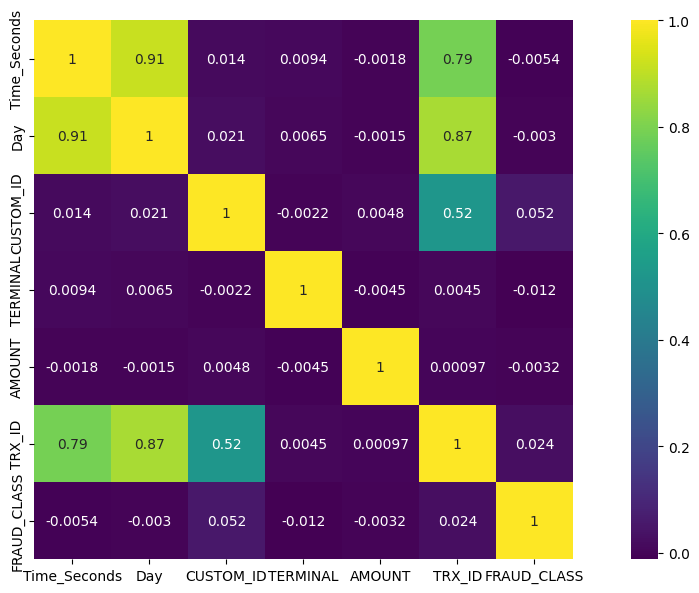

In [21]:
# Let's see how it looks a Correlation heatmap
plt.figure(figsize = (15,7))
sns.heatmap(TRANS_TABLE.corr(),vmax=1, square=True, annot=True ,cmap= 'viridis')

This heat correlation Map does not help in finding any kind of vicinity or relation among all attributes and fraud class. But this perfectly reflects the random generation of data

# 2 Feature Engineering

Some manipulation on this synthetic dataset could refer to moment of transaction and spending habits of customers.
For this reason I am going to introduce 2 new variables like:
- Binary Night/Day transaction: TRX_NIGHT = [0 = day,1 = night]
- Categorical Spending Habits: EXP_LEVEL = [LOW = 0, MEDIUM = 1, HIGH = 2]


In [22]:
print(TRANS_TABLE)

       Time_Seconds  Day  CUSTOM_ID  TERMINAL  AMOUNT            DATETIME  \
0             18270    0          0       611  419.93 2023-07-29 05:04:30   
1             73806    0          0        37   49.75 2023-07-29 20:30:06   
2             44060    0          0       137   14.28 2023-07-29 12:14:20   
3             76886    0          0       443  569.05 2023-07-29 21:21:26   
4             44138    0          0       298  297.59 2023-07-29 12:15:38   
...             ...  ...        ...       ...     ...                 ...   
24642        131668    1        999       312   26.53 2023-07-30 12:34:28   
24643        164169    1        999       354   37.72 2023-07-30 21:36:09   
24644        152837    1        999       434  478.96 2023-07-30 18:27:17   
24645        141985    1        999        87   18.01 2023-07-30 15:26:25   
24646        118985    1        999       207  424.69 2023-07-30 09:03:05   

       TRX_ID  FRAUD_CLASS  
0           0            0  
1           1    

###2.1 TRX_NIGHT
all transactions occurring between 22 pm and 5 am will be set as value 1 in a new column in transactions dataframe

In [23]:
def set_night(datetime):

  # Setting new column to dataset
  TRANS_TABLE['TRX_NIGHT'] = 0

  # Extract only hours from DATETIME thanks to a dedicated method
  hours = TRANS_TABLE['DATETIME'].dt.hour

  # Each hour will be checked and in case of night hour
  #  the variable TRX_NIGHT will be set to 1 in the same line
  i = 0
  while i < len(hours):
    if hours[i] >= 22:
      TRANS_TABLE['TRX_NIGHT'][i] = 1
    if hours[i] < 6:
      TRANS_TABLE['TRX_NIGHT'][i] = 1
    i = i + 1

  # Just a message of completed task
  print(f'All the {i} rows have been examined and the new TRX_NIGHT attribute has been set properly')

  return TRANS_TABLE.loc[TRANS_TABLE.TRX_NIGHT == 1]

In [24]:
set_night(TRANS_TABLE.DATETIME)

<ipython-input-23-7eb9405dddf5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TRANS_TABLE['TRX_NIGHT'][i] = 1
<ipython-input-23-7eb9405dddf5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TRANS_TABLE['TRX_NIGHT'][i] = 1


All the 24647 rows have been examined and the new TRX_NIGHT attribute has been set properly


,Time_Seconds,Day,CUSTOM_ID,TERMINAL,AMOUNT,DATETIME,TRX_ID,FRAUD_CLASS,TRX_NIGHT
0,18270,0,0,611,419.93,2023-07-29 05:04:30,0,0,1
6,14852,0,0,37,412.75,2023-07-29 04:07:32,6,0,1
21,8454,0,1,513,49.21,2023-07-29 02:20:54,21,0,1
32,15724,0,2,638,141.38,2023-07-29 04:22:04,32,0,1
33,11608,0,2,148,355.04,2023-07-29 03:13:28,33,0,1
...,...,...,...,...,...,...,...,...,...
24599,92782,1,996,5,614.50,2023-07-30 01:46:22,24599,0,1
24606,107495,1,997,495,29.99,2023-07-30 05:51:35,24606,0,1
24607,105552,1,997,535,35.33,2023-07-30 05:19:12,24607,0,1
24612,105506,1,997,495,97.59,2023-07-30 05:18:26,24612,0,1


### 2.2 EXP_LEVEL
By comparing the mean amount of transactions for each customer with the total transactions mean and standard deviation, we will detect 3 different levels: 0 for low, 1 for medium, 2 for high.

In [29]:
def get_exp_lvl(AMOUNT):

  # Add new column to TRANS TABLE
  TRANS_TABLE['EXP_LEVEL'] = 0

  # Extract total mean and standard deviation for next comparisons
  mean = TRANS_TABLE.AMOUNT.mean()
  std =  TRANS_TABLE.AMOUNT.std()

  # Iterating customers
  for i in TRANS_TABLE.CUSTOM_ID:

     # To extract their expenditure mean
    custom_mean = TRANS_TABLE.loc[TRANS_TABLE.CUSTOM_ID == i]['AMOUNT'].mean()

     # And compare respect to all customers mean and standard deviation

     # 0: Low exp Level
     # 1: Medium exp Level
     # 2: High exp Level

    if custom_mean < (mean - std):
      TRANS_TABLE['EXP_LEVEL'][i] = 0


    if custom_mean > (mean + std):
      TRANS_TABLE['EXP_LEVEL'][i] = 2


    if custom_mean > (mean - std) and custom_mean < (mean + std):
      TRANS_TABLE['EXP_LEVEL'][i] = 1




  return(f'Given the AVG Amount {mean.round(2)} and Standard Deviation {std.round(2)}, all the expenditure levels have been set to a new data frame column')




In [35]:
get_exp_lvl(TRANS_TABLE.AMOUNT)

<ipython-input-29-d7665ebcf65f>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TRANS_TABLE['EXP_LEVEL'][i] = 1
<ipython-input-29-d7665ebcf65f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TRANS_TABLE['EXP_LEVEL'][i] = 2


'Given the AVG Amount 263.2 and Standard Deviation 201.75, all the expenditure levels have been set to a new data frame column'

In [36]:
# Here a final simple representation of the generated dataset with new attributes from feature engineering
print(TRANS_TABLE)

       Time_Seconds  Day  CUSTOM_ID  TERMINAL  AMOUNT            DATETIME  \
0             18270    0          0       611  419.93 2023-07-29 05:04:30   
1             73806    0          0        37   49.75 2023-07-29 20:30:06   
2             44060    0          0       137   14.28 2023-07-29 12:14:20   
3             76886    0          0       443  569.05 2023-07-29 21:21:26   
4             44138    0          0       298  297.59 2023-07-29 12:15:38   
...             ...  ...        ...       ...     ...                 ...   
24642        131668    1        999       312   26.53 2023-07-30 12:34:28   
24643        164169    1        999       354   37.72 2023-07-30 21:36:09   
24644        152837    1        999       434  478.96 2023-07-30 18:27:17   
24645        141985    1        999        87   18.01 2023-07-30 15:26:25   
24646        118985    1        999       207  424.69 2023-07-30 09:03:05   

       TRX_ID  FRAUD_CLASS  TRX_NIGHT  EXP_LEVEL  
0           0           

Text(0.5, 1.0, 'Distribution of transactions divided by genuine and fraudolent during considered days')

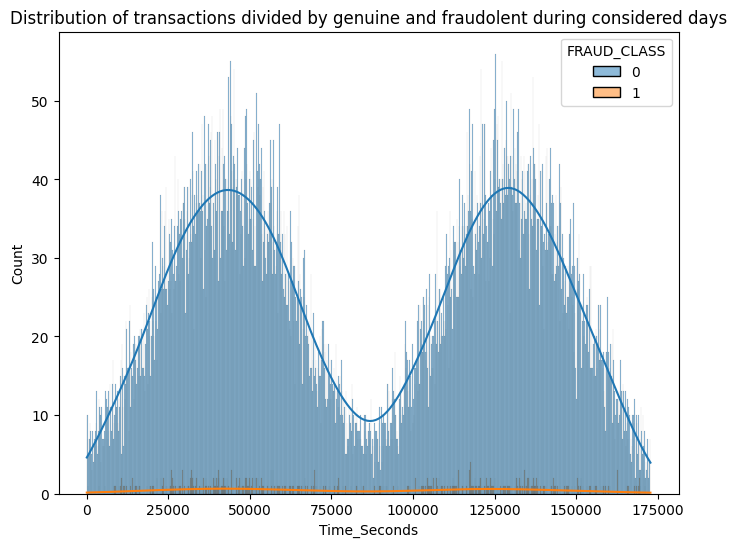

In [37]:
# And a final distribution Plot that reveals the imbalanced relation between frauds and non frauds
plt.figure(figsize=(8, 6))
sns.histplot(data=TRANS_TABLE, x='Time_Seconds', hue='FRAUD_CLASS', kde=True, bins = 1000)
plt.title('Distribution of transactions divided by genuine and fraudolent during considered days')

# 3. FRAUD DETECTION SYSTEM

A simple fraud detection system could be described in a few steps by following a Supervised methodology:                                                         
1. Define TRAIN SET and TEST SET from simulated data
2. Training a PREDICTION MODEL able to predict whether a transaction is genuine or fraudulent
3. Assess the MODEL PERFORMANCE using the test set

For efficiency reasons, here I will initialize 3 different classification algorithms, iteratively fit them into data through a pipeline before to create a table to assess their different performance

In [38]:
# Import all needed libraries from scikit learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score, f1_score, roc_auc_score

In [39]:
# Initialize classifiers
# Decision tree with depth 3, Decision tree with unlimited depth, logistic regression, random forest
clf_names = ['LogReg', 'DT_depth3', 'DecTree', 'RanFor']
classifiers = [LogisticRegression(random_state = 0), DecisionTreeClassifier(max_depth = 3,random_state = 0), DecisionTreeClassifier(random_state = 0), RandomForestClassifier(random_state = 0)]

In [40]:
# fit_and_perform function will help to unify all the necessary blocks of work by returning a complete table for assessment
def fit_and_perform(clf_names, classifiers):

  # Initialialize an empty list for adding future performance metrics
  Metrics = []

  # Use of zip function to iterate through two lists simultaneously
  for name, clf in zip(clf_names, classifiers):

    # Split data into train and test, then setting a pipeline for scaling and model fitting
    # DATETIME attribute has not a compatible format for model fitting, so only Time Seconds will be kept
    X = TRANS_TABLE.loc[:, TRANS_TABLE.columns != 'FRAUD_CLASS'].drop(columns = ['DATETIME'])
    Y = TRANS_TABLE.loc[:, 'FRAUD_CLASS']

    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.75, test_size=0.25, shuffle = True, random_state = 0)

    # make_pipeline is a constructor that lists sklearn methods and estimators that will be chained together
    clf = make_pipeline(StandardScaler(), clf)

    # Train the classifier using the `fit` method
    clf.fit(X_train, y_train)

    # Get the prediction values on test data using .predict method
    y_pred = clf.predict(X_test)

    # Get the prediction probabilities on test data using the .predict_proba method
    y_prob_pred = clf.predict_proba(X_test)

    # Performance Metrics
    avg_score = average_precision_score(y_test, y_prob_pred[:,1])
    f1score = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob_pred[:,1])


    Metrics.append([avg_score, f1score, auc_roc])

  # Introducing columns names to facilitate next steps
  Columns = ['AVG Score', 'F1 Score', 'AucRoc Curve']

  # Adjusting a performance measures dataframe for comparison
  classifiers_performance = pd.DataFrame(data = Metrics, columns = Columns, index = clf_names )

  return classifiers_performance








In [41]:
fit_and_perform(clf_names, classifiers)

,AVG Score,F1 Score,AucRoc Curve
LogReg,0.024040,0.000000,0.675694
DT_depth3,0.126741,0.187500,0.729442
DecTree,0.709213,0.840237,0.907141
RanFor,0.812032,0.525424,0.991989


### Logistic Regression
In this case, an F1 score of 0 means that the model has a very poor performance in precision and recall. AUC-ROC of 0.67 suggests that the model's ability in prediction is just a little above a random chance.
I presume that Logistic Regression is not able to classify properly any fraudolent class because of the zero true impact of any feature

### Decision Tree
Decision tree of depth 3 is still a struggling model for getting some accurate classification of frauds. Despite a moderate better area under AUC-ROC, this model can not be considereb so reliable

On the other hands, both F1 and AUC-ROC suggests that an unlimited Decision tree is capable to reach a well good and balanced performance in identification and discrimination of fraudolent cases

### Random Forest
Despite an higher Average Score, Random Forest shows interestingly a poorer performance in F1 score respect to unlimited Decision Tree. It demonstrate in any case an incredible performance according to AUC-ROC of 0.99.
While there is space for improvement about precision and recall, it is necessary to pay attention to risk of overfitting in case this model has learned too well our training data
